In [1]:
import pandas as pd

# caminho do arquivo
 
file_path = 'spotify_dataset.csv'
spotify_df = pd.read_csv(file_path)

# Visualização das primeiras linhas do dataframe
spotify_df.head()


,Nome da Faixa,Cantor ou Compositor,Genero,Quadrante,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Bulldog Down in Sunny Tennessee,Charlie Poole,Country; International,Q3,0.960000,0.649,0.390,0.000003,5,0.096,-12.237,1,0.0417,167.348,4,0.903
1,Reborn in Blasphemy,Dismember,Electronic; International; Pop/Rock,Q2,0.000008,0.246,0.985,0.839000,7,0.345,-4.002,1,0.1320,114.450,4,0.369
2,Ultrasonic Meltdown,Curse of the Golden Vampire,Electronic,Q2,0.000195,0.275,0.990,0.654000,6,0.263,-2.375,1,0.2690,152.620,4,0.141
3,Last Night,Little Walter,Blues,Q3,0.358000,0.458,0.443,0.000000,6,0.232,-10.422,0,0.0862,69.028,4,0.450
4,The Masquerade is Over,George Shearing,Jazz,Q4,0.826000,0.522,0.132,0.848000,8,0.699,-25.412,1,0.0608,90.675,4,0.539


In [2]:
# Verificando valores ausentes

missing_values = spotify_df.isnull().sum()
print("Valores Ausentes:\n", missing_values)

# Verificando os tipos de dados

print("\nTipos de Dados:\n", spotify_df.dtypes)


Valores Ausentes:
 Nome da Faixa           0
Cantor ou Compositor    0
Genero                  0
Quadrante               0
acousticness            0
danceability            0
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
mode                    0
speechiness             0
tempo                   0
time_signature          0
valence                 0
dtype: int64

Tipos de Dados:
 Nome da Faixa            object
Cantor ou Compositor     object
Genero                   object
Quadrante                object
acousticness            float64
danceability            float64
energy                  float64
instrumentalness        float64
key                       int64
liveness                float64
loudness                float64
mode                      int64
speechiness             float64
tempo                   float64
time_signature            int64
valence                 float64
dtype: object


In [3]:
from sklearn.preprocessing import StandardScaler

# Selecionando as colunas numéricas para normalização
num_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

# Aplicando a normalização
scaler = StandardScaler()
spotify_df[num_cols] = scaler.fit_transform(spotify_df[num_cols])


c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

In [4]:
from sklearn.model_selection import train_test_split

X = spotify_df[num_cols]  # Características de áudio 
y = spotify_df['Quadrante']  # Variável Target

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Podemos observar se há alguma oportunidade aqui.


In [5]:
# Balanceamento do conjunto de treino, teste e validação para que contenham a mesma proporção

from sklearn.model_selection import train_test_split

X = spotify_df[num_cols]  # Características de áudio
y = spotify_df['Quadrante']  # Variável Target

# Dividindo os dados com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# divisão em treino e teste temporários
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# divisão do conjunto de treino em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)


# Contagem da variável alvo 'Quadrante' nos conjuntos de treino, teste e validação

print("Distribuição de classes no conjunto de treino:\n", y_train.value_counts(normalize=True))
print("\nDistribuição de classes no conjunto de teste:\n", y_test.value_counts(normalize=True))
print("\nDistribuição de classes no conjunto de validação:\n", y_val.value_counts(normalize=True))


Distribuição de classes no conjunto de treino:
 Quadrante
Q4    0.262411
Q2    0.250591
Q1    0.250591
Q3    0.236407
Name: proportion, dtype: float64

Distribuição de classes no conjunto de teste:
 Quadrante
Q4    0.260563
Q1    0.253521
Q2    0.246479
Q3    0.239437
Name: proportion, dtype: float64

Distribuição de classes no conjunto de validação:
 Quadrante
Q4    0.262411
Q2    0.248227
Q1    0.248227
Q3    0.241135
Name: proportion, dtype: float64


c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


#### KNN V2

c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

Relatório de classificação para k=1:
              precision    recall  f1-score   support

          Q1       0.53      0.53      0.53        36
          Q2       0.86      0.69      0.76        35
          Q3       0.32      0.29      0.31        34
          Q4       0.36      0.46      0.40        37

    accuracy                           0.49       142
   macro avg       0.52      0.49      0.50       142
weighted avg       0.52      0.49      0.50       142
 

Relatório de classificação para k=2:
              precision    recall  f1-score   support

          Q1       0.51      0.72      0.60        36
          Q2       0.72      0.74      0.73        35
          Q3       0.44      0.47      0.46        34
          Q4       0.63      0.32      0.43        37

    accuracy                           0.56       142
   macro avg       0.58      0.56      0.55       142
weighted avg       0.58      0.56      0.55       142
 

Relatório de classificação para k=3:
              p

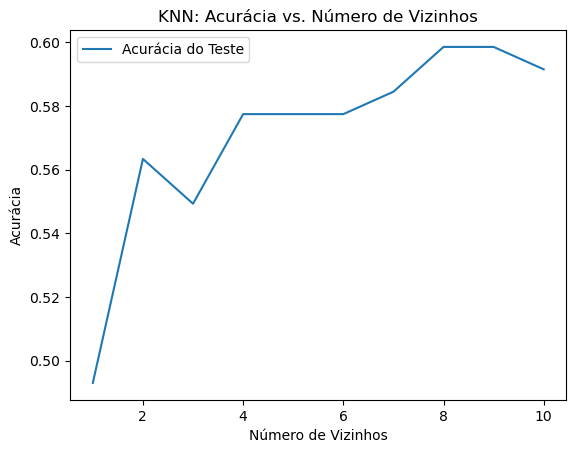

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Listas para armazenar os resultados
neighbors_settings = range(1, 11)  # Testar de 1 a 10 vizinhos
accuracy_scores = []

# Loop para treinar e testar o KNN com diferentes números de vizinhos
for n_neighbors in neighbors_settings:
    
    # Criar e treinar o modelo
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    # Fazer previsões no conjunto de teste
    y_pred = knn.predict(X_test)
    
    # Calcular e armazenar a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Imprimir o relatório de classificação para cada modelo
    print(f'Relatório de classificação para k={n_neighbors}:')
    print(classification_report(y_test, y_pred), '\n')

# Plotar os resultados
plt.plot(neighbors_settings, accuracy_scores, label='Acurácia do Teste')
plt.ylabel('Acurácia')
plt.xlabel('Número de Vizinhos')
plt.title('KNN: Acurácia vs. Número de Vizinhos')
plt.legend()
plt.show()


In [32]:
import joblib

# Identificar o melhor número de vizinhos
best_k = neighbors_settings[accuracy_scores.index(max(accuracy_scores))]

# Treinar o modelo novamente com o melhor k
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

# Salvar o modelo
joblib.dump(best_knn_model, r'best_knn_model.joblib')

c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

['best_knn_model.joblib']

Variando L1 e L2

c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

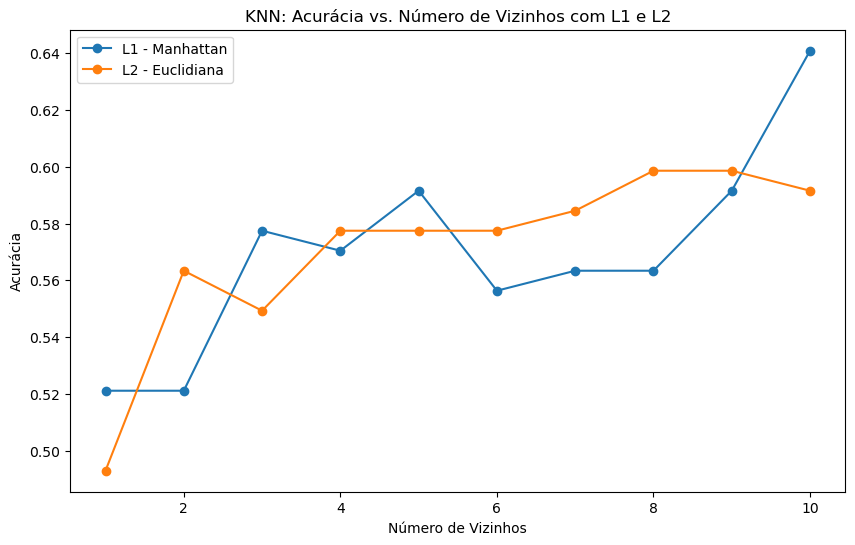

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Listas para armazenar os resultados
neighbors_settings = range(1, 11)  # Testar de 1 a 10 vizinhos
accuracy_scores_l1 = []
accuracy_scores_l2 = []

# Loop para treinar e testar o KNN com diferentes números de vizinhos e distâncias L1 e L2
for n_neighbors in neighbors_settings:
    
    # KNN com distância L1 (Manhattan)
    knn_l1 = KNeighborsClassifier(n_neighbors=n_neighbors, p=1)
    knn_l1.fit(X_train, y_train)
    y_pred_l1 = knn_l1.predict(X_test)
    accuracy_scores_l1.append(accuracy_score(y_test, y_pred_l1))
    
    # KNN com distância L2 (Euclidiana)
    knn_l2 = KNeighborsClassifier(n_neighbors=n_neighbors, p=2)
    knn_l2.fit(X_train, y_train)
    y_pred_l2 = knn_l2.predict(X_test)
    accuracy_scores_l2.append(accuracy_score(y_test, y_pred_l2))

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, accuracy_scores_l1, label='L1 - Manhattan', marker='o')
plt.plot(neighbors_settings, accuracy_scores_l2, label='L2 - Euclidiana', marker='o')
plt.title('KNN: Acurácia vs. Número de Vizinhos com L1 e L2')
plt.xlabel('Número de Vizinhos')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


In [9]:
# Considerando que o melhor modelo é um Manhattan com 10 vizinhos, vamos exportá-lo

import joblib

melhor_knn_model = KNeighborsClassifier(n_neighbors=10, p=1)
melhor_knn_model.fit(X_train, y_train)

# Salvar o modelo

joblib.dump(melhor_knn_model, 'melhor_knn_model.joblib')


c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

['melhor_knn_model.joblib']

#### NAIVE BAYES - V2

c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

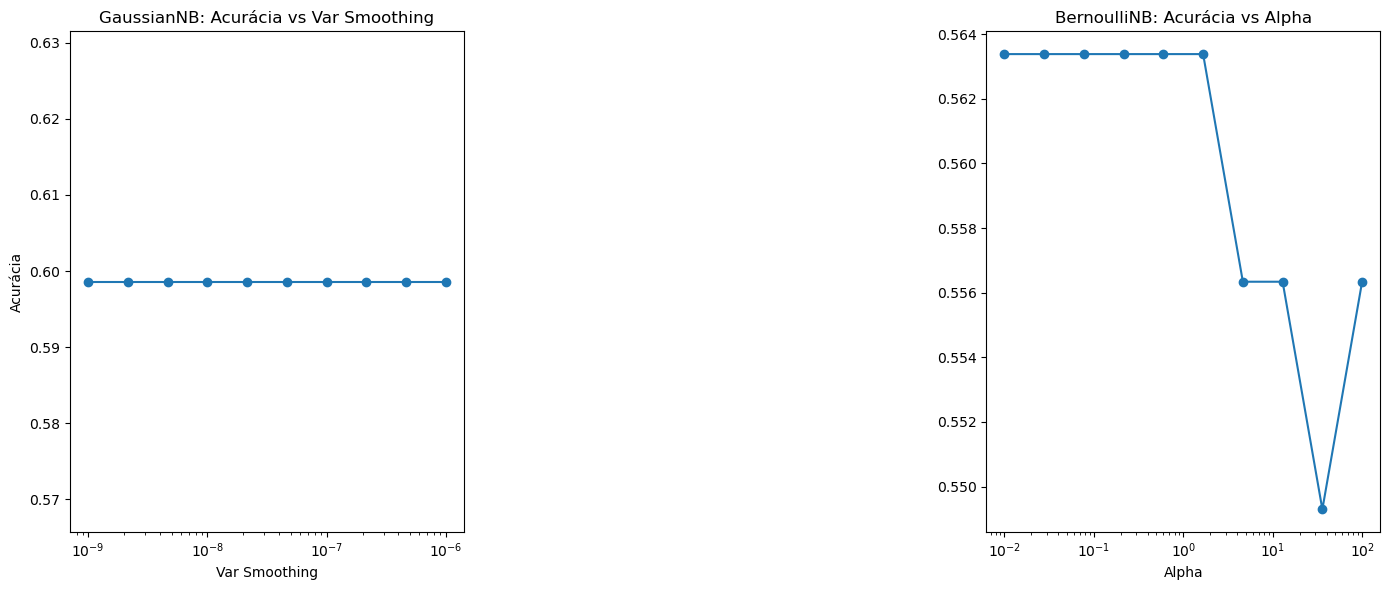

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score


# Hiperparâmetros para testar
alphas = np.logspace(-2, 2, 10)  # Para MultinomialNB e BernoulliNB
var_smoothing_values = np.logspace(-9, -6, 10)  # Para GaussianNB

# Listas para armazenar os resultados
accuracy_scores_gaussian = []
accuracy_scores_bernoulli = []

# Testar GaussianNB
for var_smoothing in var_smoothing_values:
    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train, y_train)
    accuracy_scores_gaussian.append(accuracy_score(y_test, model.predict(X_test)))

# Testar BernoulliNB
for alpha in alphas:
    model = BernoulliNB(alpha=alpha)
    model.fit(X_train, y_train)
    accuracy_scores_bernoulli.append(accuracy_score(y_test, model.predict(X_test)))

# Plotar os resultados para GaussianNB
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.plot(var_smoothing_values, accuracy_scores_gaussian, marker='o')
plt.title('GaussianNB: Acurácia vs Var Smoothing')
plt.xlabel('Var Smoothing')
plt.ylabel('Acurácia')
plt.xscale('log')

# Plotar os resultados para BernoulliNB
plt.subplot(1, 3, 3)
plt.plot(alphas, accuracy_scores_bernoulli, marker='o')
plt.title('BernoulliNB: Acurácia vs Alpha')
plt.xlabel('Alpha')
plt.xscale('log')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import joblib


# Inicializando o GaussianNB com o var_smoothing escolhido considerando o ultimo gráfico
var_smoothing_optimal = 1e-9  # Exemplo de valor, ajuste conforme necessário
best_gaussian_model = GaussianNB(var_smoothing=var_smoothing_optimal)

# Treino do modelo com os dados de treinamento
best_gaussian_model.fit(X_train, y_train)

# previsões no conjunto de teste
y_pred = best_gaussian_model.predict(X_test)

# Calculo da acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do GaussianNB com var_smoothing de 1e-9: {accuracy:.4f}')


# Salve o modelo treinado em um arquivo
joblib.dump(best_gaussian_model, 'best_gaussian_model.joblib')



Acurácia do GaussianNB com var_smoothing de 1e-9: 0.5986


c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

['best_gaussian_model.joblib']


#### RANDOM FOREST - V2

c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

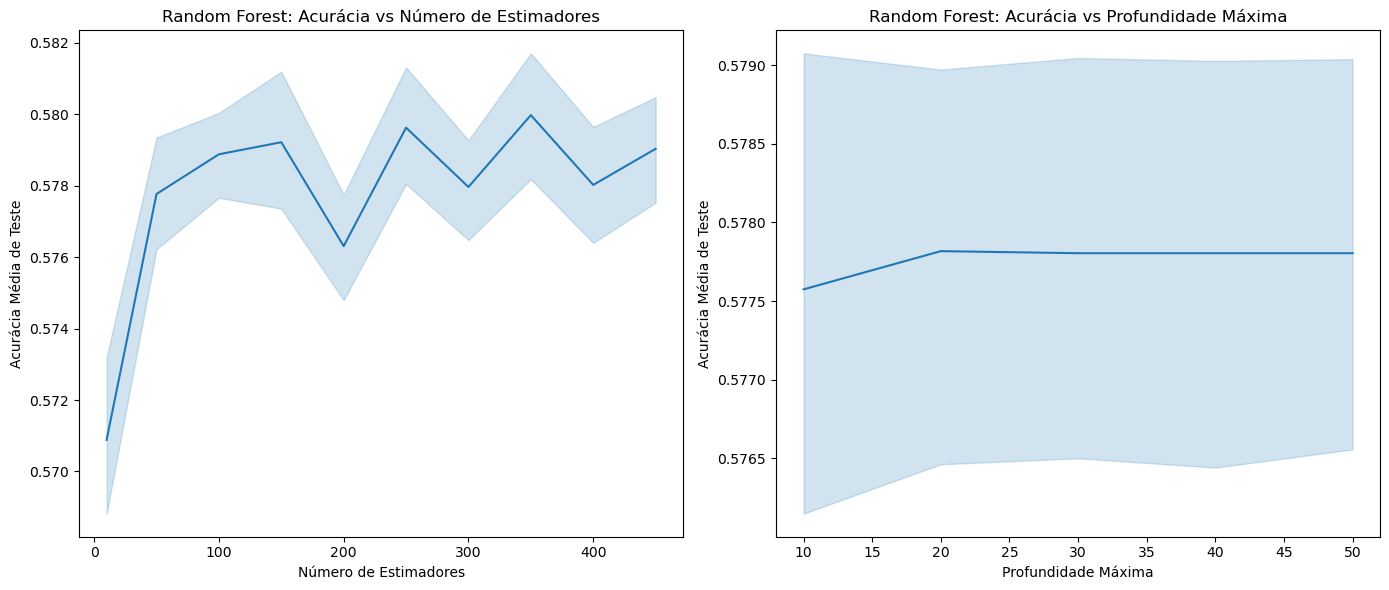

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o espaço de hiperparâmetros para testar 10 combinações
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350, 400, 450],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Criar o objeto GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Treinar o modelo com os dados de treinamento e diferentes hiperparâmetros
# Este processo pode levar algum tempo dependendo do tamanho do dataset e do número de combinações
rf_grid_search.fit(X_train, y_train)

# Resultados em um DataFrame para facilitar a visualização e análise
results_df = pd.DataFrame(rf_grid_search.cv_results_)

# Melhores parâmetros e melhor score
best_params = rf_grid_search.best_params_
best_score = rf_grid_search.best_score_

# Salvar o modelo (não será executado aqui devido à limitação do ambiente)
# joblib.dump(rf_grid_search.best_estimator_, 'best_random_forest_model.joblib')

# Extraindo apenas os resultados para os hiperparâmetros mais relevantes
# e criando gráficos baseados nesses resultados

# Filtrando os resultados para n_estimators e max_depth, que são dois dos hiperparâmetros mais impactantes
estimators_results = results_df.loc[results_df['param_max_features'] == 'auto']
depth_results = results_df.loc[results_df['param_max_features'] == 'auto']

# Plotando acurácia vs n_estimators
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=estimators_results, x='param_n_estimators', y='mean_test_score')
plt.title('Random Forest: Acurácia vs Número de Estimadores')
plt.xlabel('Número de Estimadores')
plt.ylabel('Acurácia Média de Teste')

# Plotando acurácia vs max_depth
plt.subplot(1, 2, 2)
sns.lineplot(data=depth_results, x='param_max_depth', y='mean_test_score')
plt.title('Random Forest: Acurácia vs Profundidade Máxima')
plt.xlabel('Profundidade Máxima')
plt.ylabel('Acurácia Média de Teste')

plt.tight_layout()
plt.show()



#### KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Configurar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo
knn.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

# Salvar o modelo

joblib.dump(knn, 'KNN_MODEL.pkl')


Matriz de Confusão:
 [[21  6  2  5]
 [ 8 23  1  2]
 [ 8  3 13 11]
 [13  4  8 14]]

Relatório de Classificação:
               precision    recall  f1-score   support

          Q1       0.42      0.62      0.50        34
          Q2       0.64      0.68      0.66        34
          Q3       0.54      0.37      0.44        35
          Q4       0.44      0.36      0.39        39

    accuracy                           0.50       142
   macro avg       0.51      0.51      0.50       142
weighted avg       0.51      0.50      0.49       142

Acurácia: 50.00%


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

['KNN_MODEL.pkl']

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

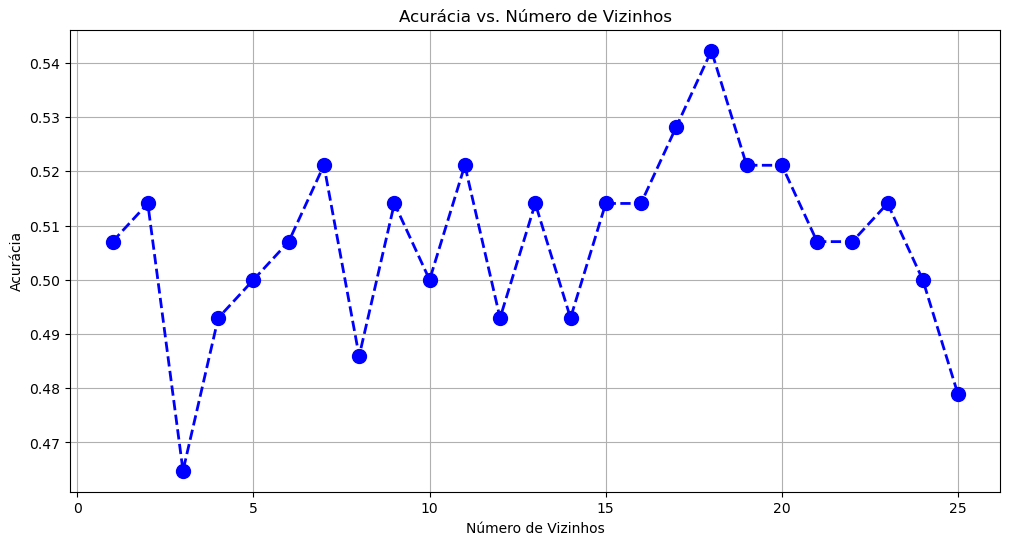

In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Intervalo de valores para n_neighbors
neighbors = range(1, 26)

# Lista para armazenar as acurácias
accuracies = []

# Testar o modelo com diferentes valores de n_neighbors
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(neighbors, accuracies, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=10)
plt.title('Acurácia vs. Número de Vizinhos')
plt.xlabel('Número de Vizinhos')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()

#### Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

# Criar uma instância do Gaussian Naive Bayes
nb = GaussianNB()

# Treinar o modelo
nb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_nb = nb.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_nb))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_nb))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred_nb) * 100))


Matriz de Confusão:
 [[21  8  1  4]
 [ 5 26  2  1]
 [12  2 14  7]
 [11  3 10 15]]

Relatório de Classificação:
               precision    recall  f1-score   support

          Q1       0.43      0.62      0.51        34
          Q2       0.67      0.76      0.71        34
          Q3       0.52      0.40      0.45        35
          Q4       0.56      0.38      0.45        39

    accuracy                           0.54       142
   macro avg       0.54      0.54      0.53       142
weighted avg       0.54      0.54      0.53       142

Acurácia: 53.52%


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

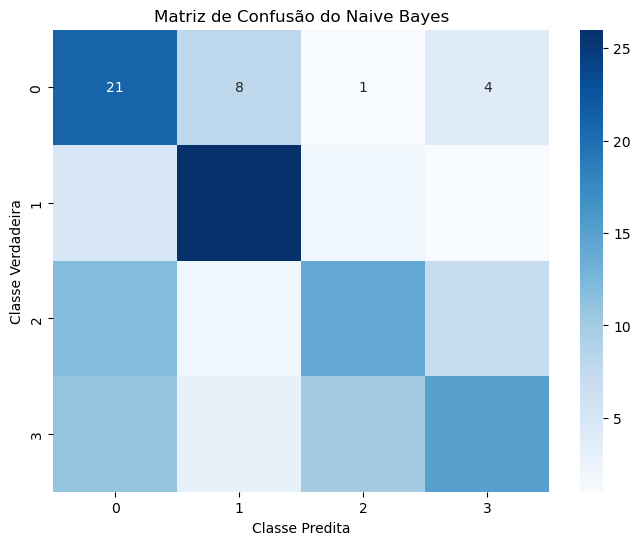

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obter a matriz de confusão
cm = confusion_matrix(y_test, y_pred_nb)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão do Naive Bayes')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


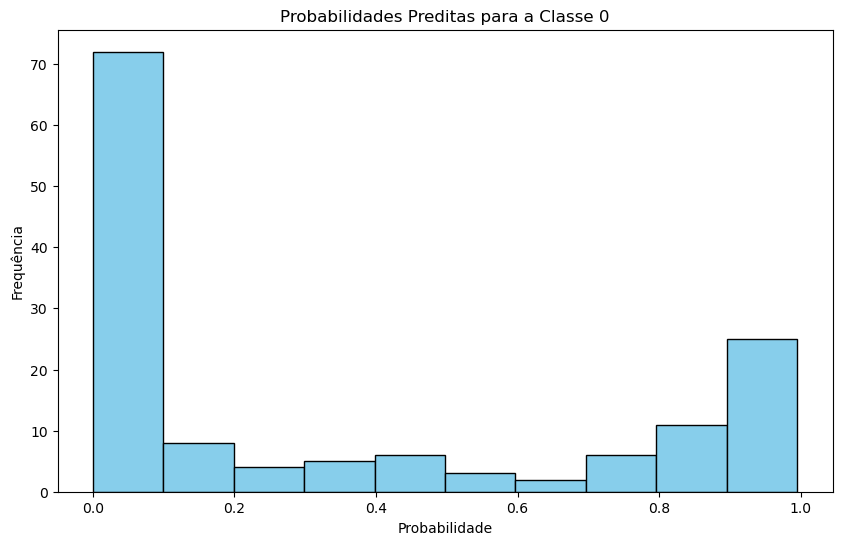

In [10]:
import numpy as np

# Obter probabilidades preditas
probabilidades = nb.predict_proba(X_test)

# Para simplificar, vamos plotar as probabilidades de uma classe
classe = 0  # ajuste conforme necessário
prob_classe = probabilidades[:, classe]

# Plotar as probabilidades
plt.figure(figsize=(10, 6))
plt.hist(prob_classe, bins=10, color='skyblue', edgecolor='black')
plt.title(f'Probabilidades Preditas para a Classe {classe}')
plt.xlabel('Probabilidade')
plt.ylabel('Frequência')
plt.show()

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


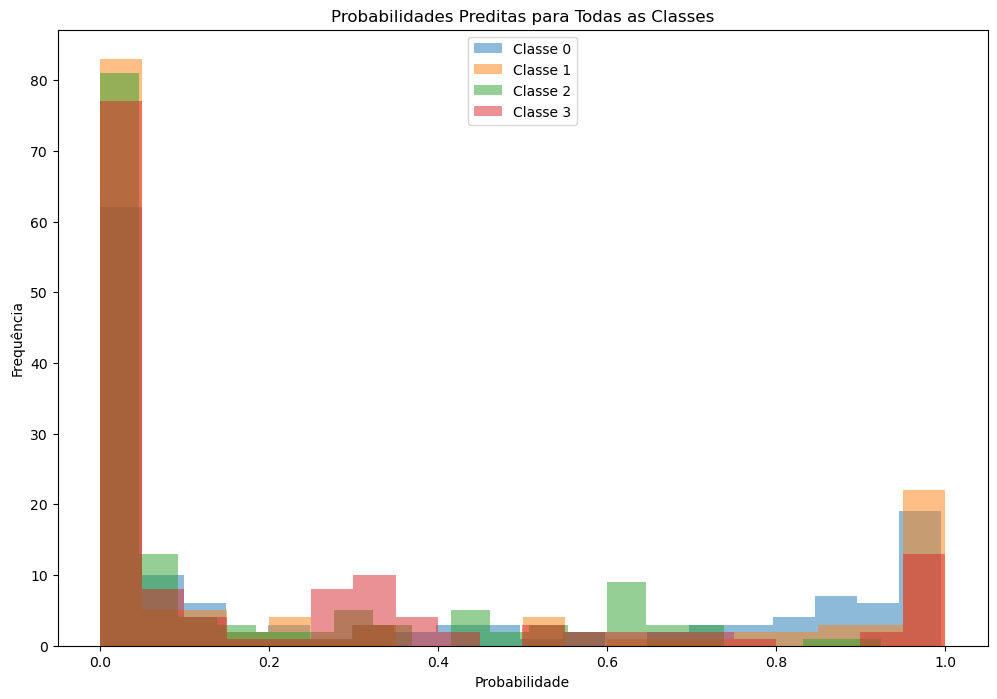

In [11]:
# Obter probabilidades preditas
probabilidades = nb.predict_proba(X_test)

# Número de classes
n_classes = probabilidades.shape[1]

plt.figure(figsize=(12, 8))

# Criar um histograma para cada classe
for i in range(n_classes):
    plt.hist(probabilidades[:, i], bins=20, alpha=0.5, label=f'Classe {i}')

plt.title('Probabilidades Preditas para Todas as Classes')
plt.xlabel('Probabilidade')
plt.ylabel('Frequência')
plt.legend(loc='upper center')
plt.show()

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

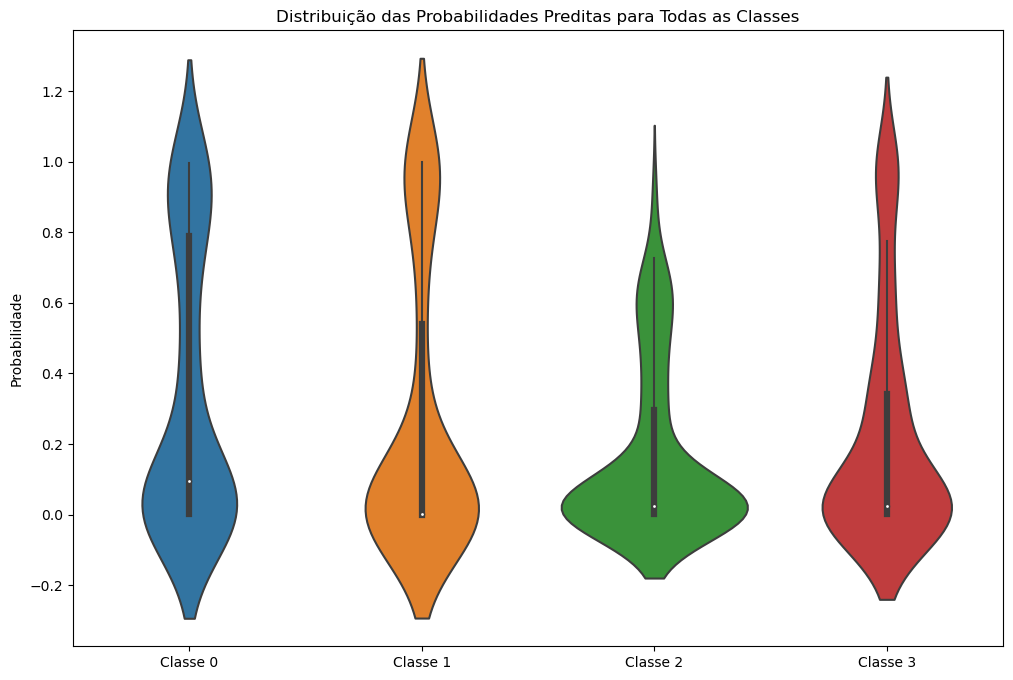

In [12]:
import pandas as pd
import seaborn as sns

# Converter as probabilidades em um DataFrame para facilitar a plotagem
df_prob = pd.DataFrame(probabilidades, columns=[f'Classe {i}' for i in range(n_classes)])

plt.figure(figsize=(12, 8))

# Criar um gráfico de violino para cada classe
sns.violinplot(data=df_prob)
plt.title('Distribuição das Probabilidades Preditas para Todas as Classes')
plt.ylabel('Probabilidade')
plt.show()

#### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Criar uma instância do modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Treinar o modelo
rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

Matriz de Confusão:
 [[21  6  1  6]
 [ 6 25  1  2]
 [ 8  2 13 12]
 [ 9  1 11 18]]

Relatório de Classificação:
               precision    recall  f1-score   support

          Q1       0.48      0.62      0.54        34
          Q2       0.74      0.74      0.74        34
          Q3       0.50      0.37      0.43        35
          Q4       0.47      0.46      0.47        39

    accuracy                           0.54       142
   macro avg       0.55      0.55      0.54       142
weighted avg       0.54      0.54      0.54       142

Acurácia: 54.23%


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

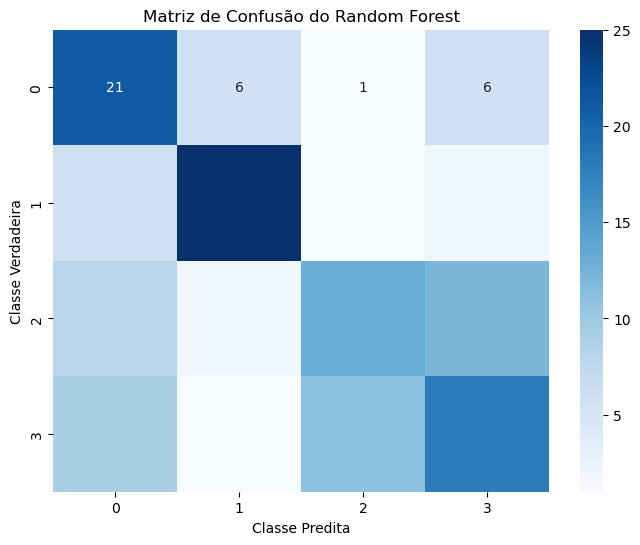

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obter a matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão do Random Forest')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


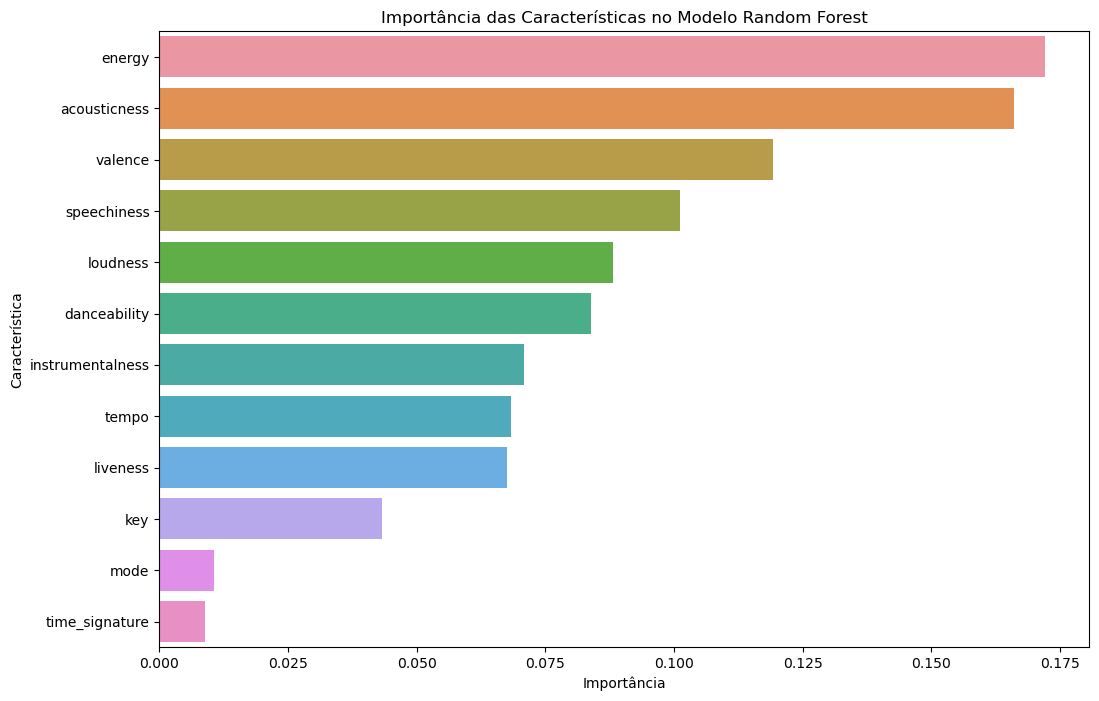

In [17]:
# Obter a importância das características
feature_importances = rf.feature_importances_

# Converter as importâncias em um DataFrame para facilitar a visualização
features_df = pd.DataFrame({'Característica': X_train.columns, 'Importância': feature_importances})

# Ordenar as características pela importância
features_df = features_df.sort_values(by='Importância', ascending=False)

# Plotar a importância das características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Característica', data=features_df)
plt.title('Importância das Características no Modelo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir as combinações de hiperparâmetros para testar
param_combinations = [
    {'n_estimators': 10, 'max_depth': None, 'min_samples_split': 2},
    {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2},
    {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 4},
    {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 6},
    {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 8}
]

# Lista para armazenar os resultados
results = []

# Testar cada combinação de hiperparâmetros
for params in param_combinations:
    rf = RandomForestClassifier(n_estimators=params['n_estimators'],
                                max_depth=params['max_depth'],
                                min_samples_split=params['min_samples_split'],
                                random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'params': params, 'accuracy': accuracy})

# Converter resultados em um DataFrame
results_df = pd.DataFrame(results)


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


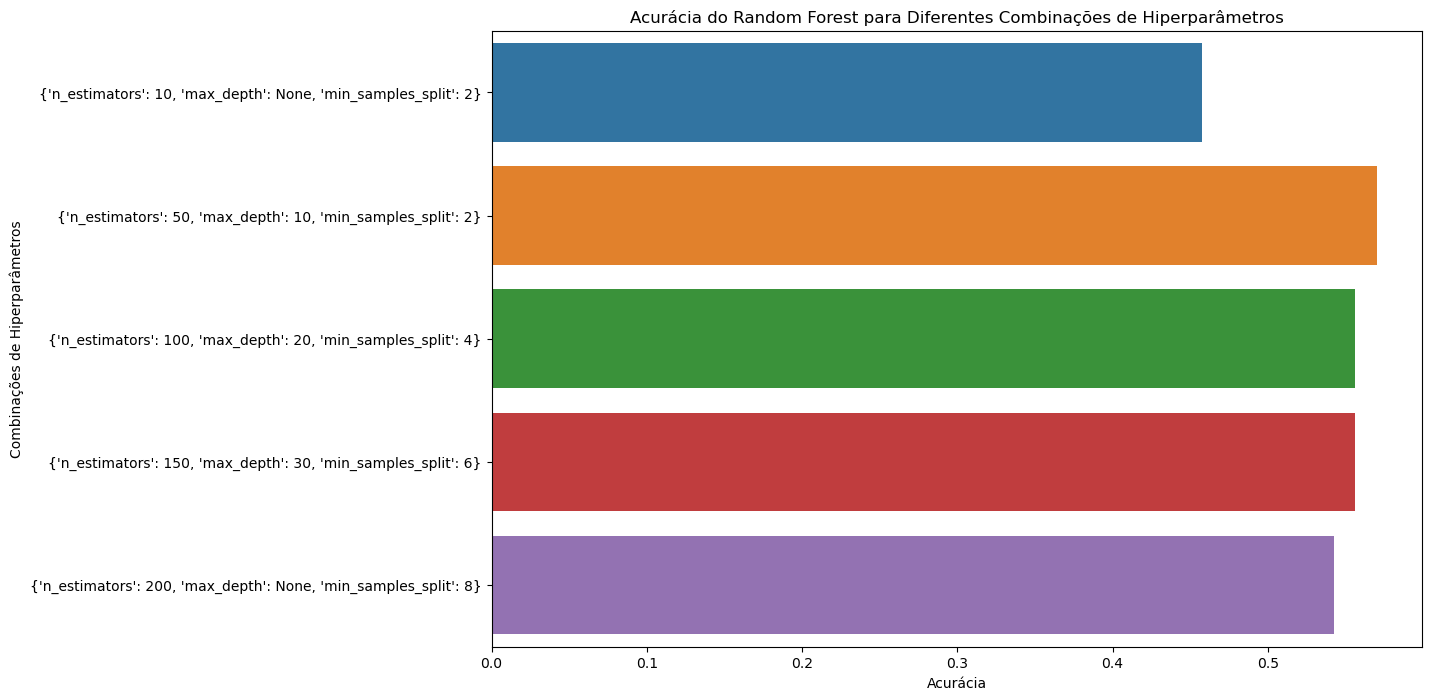

In [19]:
# Plotar os resultados
plt.figure(figsize=(12, 8))
sns.barplot(x='accuracy', y=results_df['params'].astype(str), data=results_df)
plt.title('Acurácia do Random Forest para Diferentes Combinações de Hiperparâmetros')
plt.xlabel('Acurácia')
plt.ylabel('Combinações de Hiperparâmetros')
plt.show()


#### Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Criar uma instância do modelo Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)

# Treinar o modelo
gbc.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_gbc = gbc.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_gbc))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_gbc))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred_gbc) * 100))

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

Matriz de Confusão:
 [[18  6  4  6]
 [ 2 26  3  3]
 [ 9  1 12 13]
 [ 8  1  9 21]]

Relatório de Classificação:
               precision    recall  f1-score   support

          Q1       0.49      0.53      0.51        34
          Q2       0.76      0.76      0.76        34
          Q3       0.43      0.34      0.38        35
          Q4       0.49      0.54      0.51        39

    accuracy                           0.54       142
   macro avg       0.54      0.54      0.54       142
weighted avg       0.54      0.54      0.54       142

Acurácia: 54.23%


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Definir as combinações de hiperparâmetros para testar
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 0.01, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 4},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5},
    {'n_estimators': 250, 'learning_rate': 0.2, 'max_depth': 4}
]

# Lista para armazenar os resultados
results = []

# Testar cada combinação de hiperparâmetros
for params in param_combinations:
    gbc = GradientBoostingClassifier(n_estimators=params['n_estimators'],
                                     learning_rate=params['learning_rate'],
                                     max_depth=params['max_depth'],
                                     random_state=42)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'params': params, 'accuracy': accuracy})

# Converter resultados em um DataFrame
results_df = pd.DataFrame(results)

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


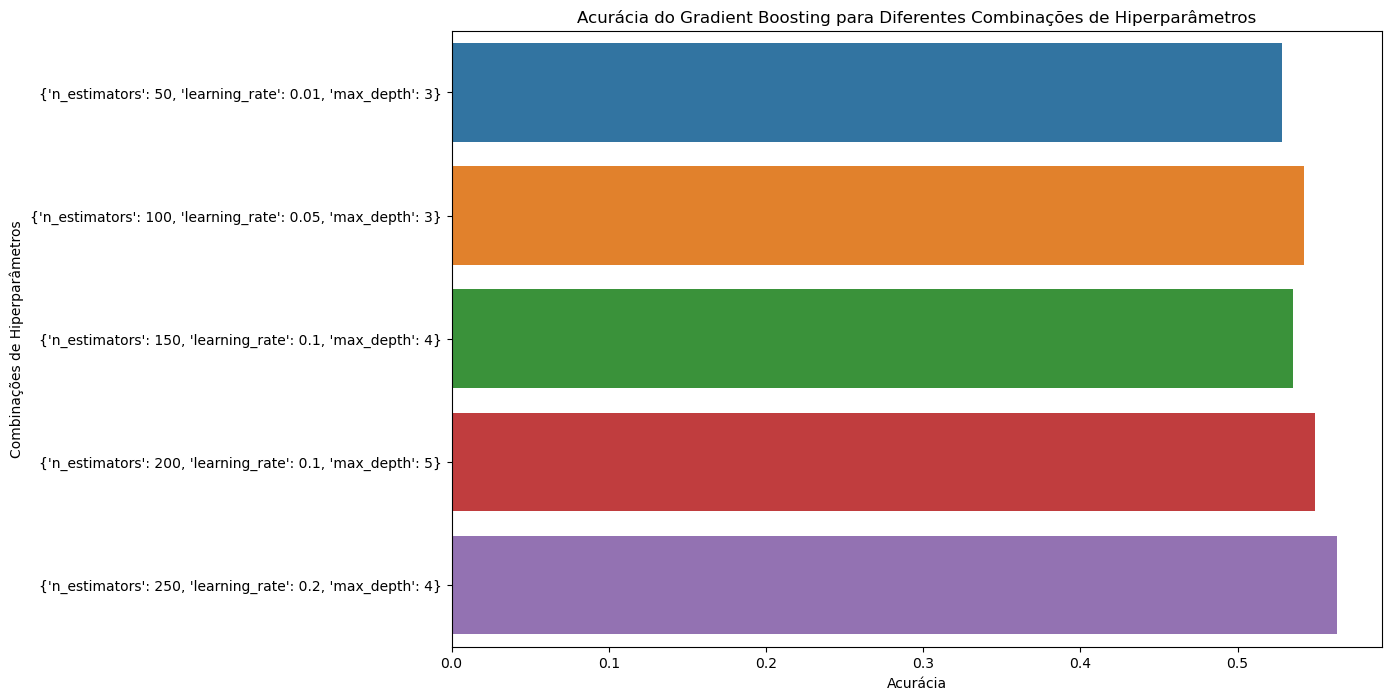

In [23]:
# Plotar os resultados
plt.figure(figsize=(12, 8))
sns.barplot(x='accuracy', y=results_df['params'].astype(str), data=results_df)
plt.title('Acurácia do Gradient Boosting para Diferentes Combinações de Hiperparâmetros')
plt.xlabel('Acurácia')
plt.ylabel('Combinações de Hiperparâmetros')
plt.show()


#### XGBoosting

In [17]:
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
le = LabelEncoder()

# Ajustar e transformar as classes
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)



# Criar uma instância do modelo XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42)

# Treinar o modelo XGBoost com as classes codificadas
xgb_clf.fit(X_train, y_train_encoded)

# Fazer previsões no conjunto de teste
y_pred_xgb = xgb_clf.predict(X_test)

# Avaliar o modelo (lembre-se de decodificar as previsões de volta para as classes originais se necessário)
print("Matriz de Confusão:\n", confusion_matrix(y_test_encoded, y_pred_xgb))
print("\nRelatório de Classificação:\n", classification_report(y_test_encoded, y_pred_xgb))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_encoded, y_pred_xgb) * 100))


c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


NameError: name 'confusion_matrix' is not defined

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Definir as combinações de hiperparâmetros para testar
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 0.01, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 5},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 6},
    {'n_estimators': 250, 'learning_rate': 0.2, 'max_depth': 7}
]

# Lista para armazenar os resultados
results = []

# Testar cada combinação de hiperparâmetros
for params in param_combinations:
    xgb_model = XGBClassifier(n_estimators=params['n_estimators'],
                              learning_rate=params['learning_rate'],
                              max_depth=params['max_depth'],
                              random_state=42)
    xgb_model.fit(X_train, y_train_encoded)
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    results.append({'params': params, 'accuracy': accuracy})

# Converter resultados em um DataFrame
results_df = pd.DataFrame(results)

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


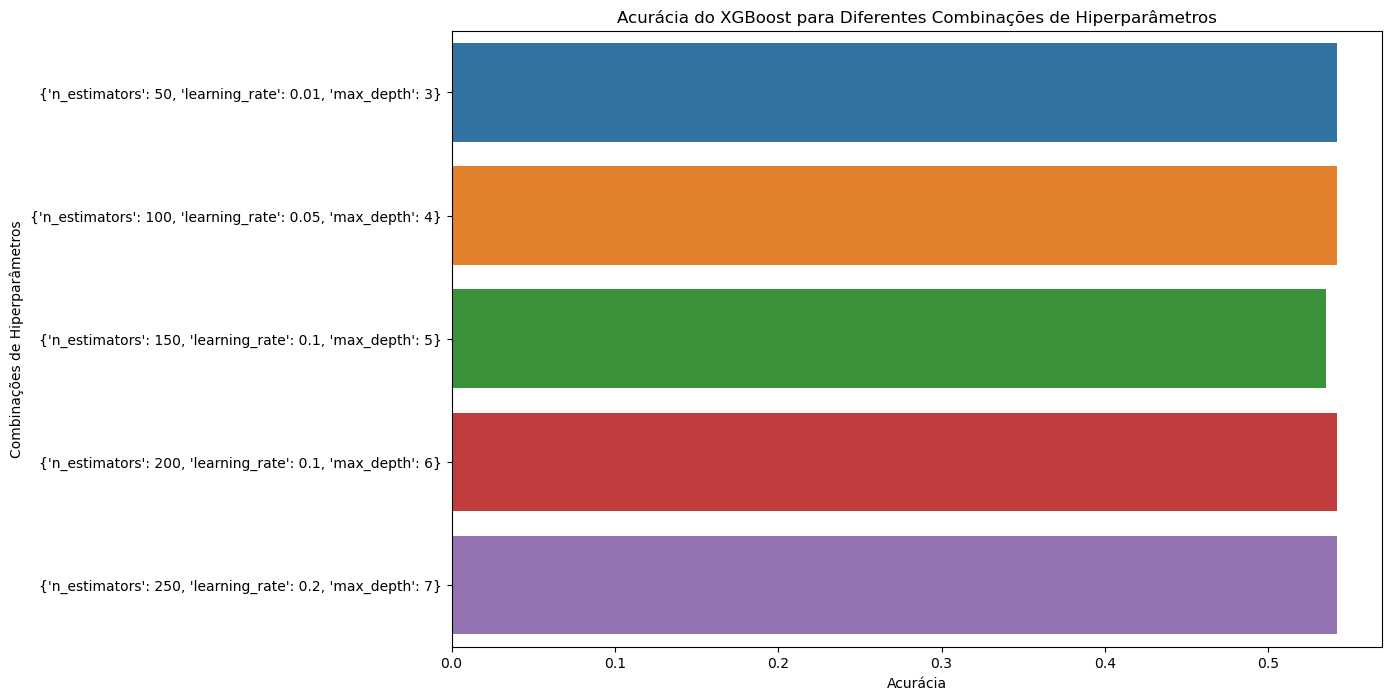

In [27]:
# Plotar os resultados
plt.figure(figsize=(12, 8))
sns.barplot(x='accuracy', y=results_df['params'].astype(str), data=results_df)
plt.title('Acurácia do XGBoost para Diferentes Combinações de Hiperparâmetros')
plt.xlabel('Acurácia')
plt.ylabel('Combinações de Hiperparâmetros')
plt.show()


### Redes Neurais ####

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
le = LabelEncoder()

# Ajustar e transformar as classes
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Criar o modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Usando 4 porque temos 4 classes (Q1, Q2, Q3, Q4)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print("Acurácia: {:.2f}%".format(accuracy * 100))



Epoch 1/50


c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.




11/11 [==============================] - 1s 19ms/step - loss: 1.5796 - accuracy: 0.2515 - val_loss: 1.2889 - val_accuracy: 0.4353
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 1.4703 - accuracy: 0.3402 - val_loss: 1.2277 - val_accuracy: 0.4353
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 1.4632 - accuracy: 0.3314 - val_loss: 1.1792 - val_accuracy: 0.4824
Epoch 4/50
11/11 [==============================] - 0s 4ms/step - loss: 1.3906 - accuracy: 0.3876 - val_loss: 1.1397 - val_accuracy: 0.5059
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 1.3165 - accuracy: 0.3994 - val_loss: 1.1158 - val_accuracy: 0.5176
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 1.3093 - accuracy: 0.3698 - val_loss: 1.0985 - val_accuracy: 0.5412
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 1.2370 - accuracy: 0.4527 - val_loss: 1.0839 - val_accuracy: 0.5647
Epoch 8/50
11/11 [==========

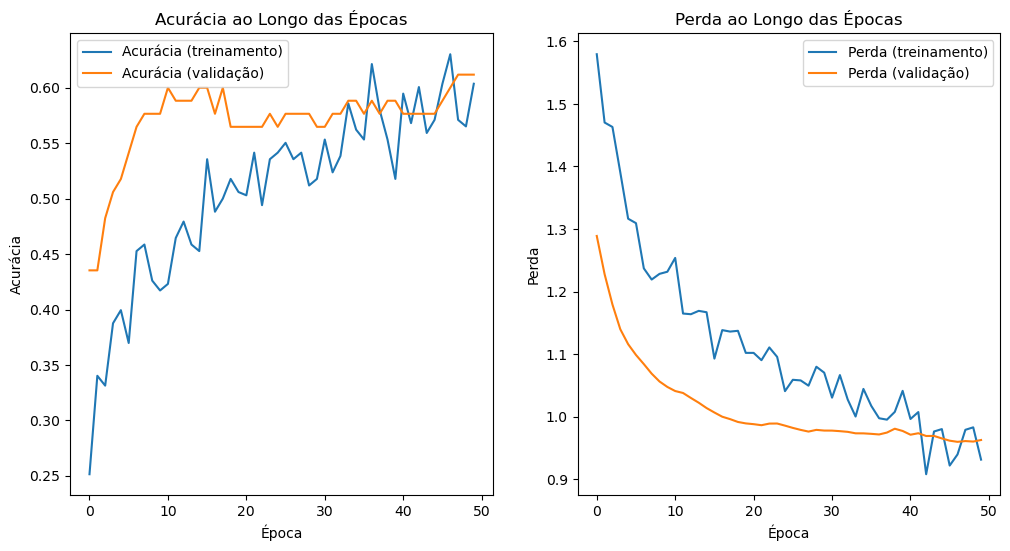

In [19]:

import matplotlib.pyplot as plt

# Plotar a acurácia do treinamento e validação
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia (treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia ao Longo das Épocas')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()

# Plotar a perda do treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda (treinamento)')
plt.plot(history.history['val_loss'], label='Perda (validação)')
plt.title('Perda ao Longo das Épocas')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend()

plt.show()


#### RNA - Mais profunda ####

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Criar o modelo
model_complex = Sequential()

# Primeira camada oculta
model_complex.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.5))

# Segunda camada oculta
model_complex.add(Dense(64, activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.5))

# Terceira camada oculta
model_complex.add(Dense(32, activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.5))

# Camada de saída
model_complex.add(Dense(4, activation='softmax'))  # 4 classes de saída


In [27]:
model_complex.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

history_complex = model_complex.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

# Salvar o modelo
model_complex.save('nn_model.keras')


Epoch 1/100
11/11 [==============================] - 1s 20ms/step - loss: 0.4846 - accuracy: 0.8402 - val_loss: 1.6405 - val_accuracy: 0.5647
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.3931 - accuracy: 0.8550 - val_loss: 1.6333 - val_accuracy: 0.5529
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.3938 - accuracy: 0.8402 - val_loss: 1.6244 - val_accuracy: 0.5529
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4881 - accuracy: 0.8462 - val_loss: 1.6217 - val_accuracy: 0.5529
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4033 - accuracy: 0.8491 - val_loss: 1.6429 - val_accuracy: 0.5647
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4411 - accuracy: 0.8343 - val_loss: 1.6586 - val_accuracy: 0.5647
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.8166 - val_loss: 1.6500 - val_accuracy: 0.5529
Epoch 8/100


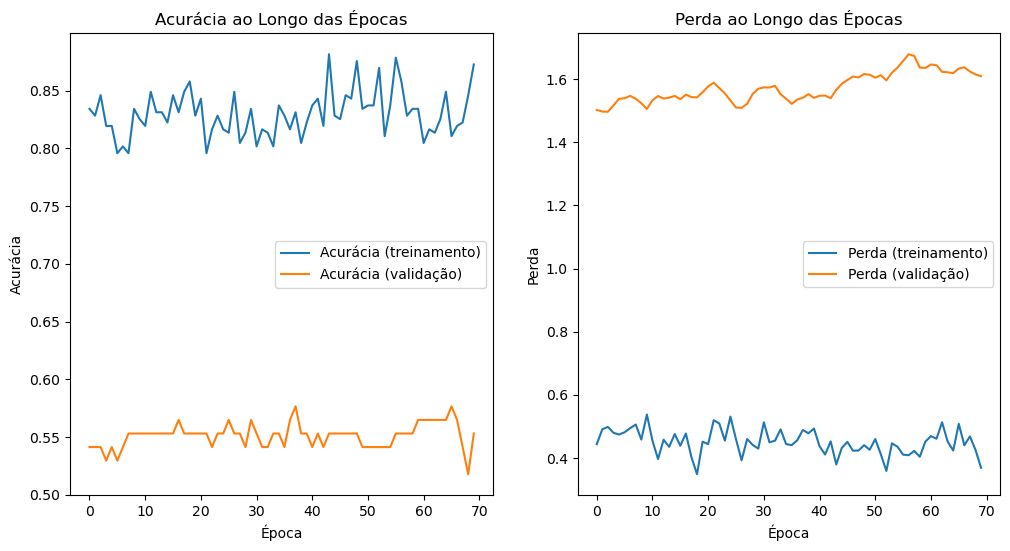

In [26]:
import matplotlib.pyplot as plt

# Plotar a acurácia do treinamento e validação
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_complex.history['accuracy'], label='Acurácia (treinamento)')
plt.plot(history_complex.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia ao Longo das Épocas')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()

# Plotar a perda do treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history_complex.history['loss'], label='Perda (treinamento)')
plt.plot(history_complex.history['val_loss'], label='Perda (validação)')
plt.title('Perda ao Longo das Épocas')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend()

plt.show()


#### SVM ####

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# É comum usar pipelines para combinar a etapa de pré-processamento com o modelo
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))

# Treinar o modelo com os dados de treinamento
svm_pipeline.fit(X_train, y_train)

# Previsões no conjunto de Teste

y_pred_svm = svm_pipeline.predict(X_test)

# Avaliação do modelo

print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_svm))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_svm))
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred_svm) * 100))

f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

Matriz de Confusão:
 [[20  8  1  5]
 [ 4 27  1  2]
 [ 9  2 14 10]
 [ 9  2 13 15]]

Relatório de Classificação:
               precision    recall  f1-score   support

          Q1       0.48      0.59      0.53        34
          Q2       0.69      0.79      0.74        34
          Q3       0.48      0.40      0.44        35
          Q4       0.47      0.38      0.42        39

    accuracy                           0.54       142
   macro avg       0.53      0.54      0.53       142
weighted avg       0.53      0.54      0.53       142

Acurácia: 53.52%


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir o espaço de hiperparâmetros para testar
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Regularização
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],   # Parâmetro do Kernel
    'kernel': ['rbf']                          # Tipo do Kernel
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

# Treinar o modelo SVM com os dados de treinamento e diferentes hiperparâmetros
grid_search.fit(X_train, y_train)

# Melhores parâmetros e melhor score
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score:", grid_search.best_score_)


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.265 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.257 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.257 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.257 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.259 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.558 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.575 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.531 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.540 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.549 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.558 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.504 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.527 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.265 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.257 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.257 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.257 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.259 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.265 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.257 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.257 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.257 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.259 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.460 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.460 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.451 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.442 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.455 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.584 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.655 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.619 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.619 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.566 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.619 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.584 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.634 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.531 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.531 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.558 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.504 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.545 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.265 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.257 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.257 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.257 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.259 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.469 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.451 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.434 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.460 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.464 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.584 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.540 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.593 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.584 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.611 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.598 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.611 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.558 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.619 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.602 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.531 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.531 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.566 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.513 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.536 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.469 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.451 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.434 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.460 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.464 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.584 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.496 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.527 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.611 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.602 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.593 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.527 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.593 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.602 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.619 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.602 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.634 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.611 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.566 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.619 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.593 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.469 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.451 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.434 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.460 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.464 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.584 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.487 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.527 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.558 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.478 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.540 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.584 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.491 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.584 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.593 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.619 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.602 total time=   0.0s


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.580 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.602 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.566 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.628 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.593 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.616 total time=   0.0s
Melhores Parâmetros: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Melhor Score: 0.6099715549936789


f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Programas\anaconda3\envs\uspspotenv\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

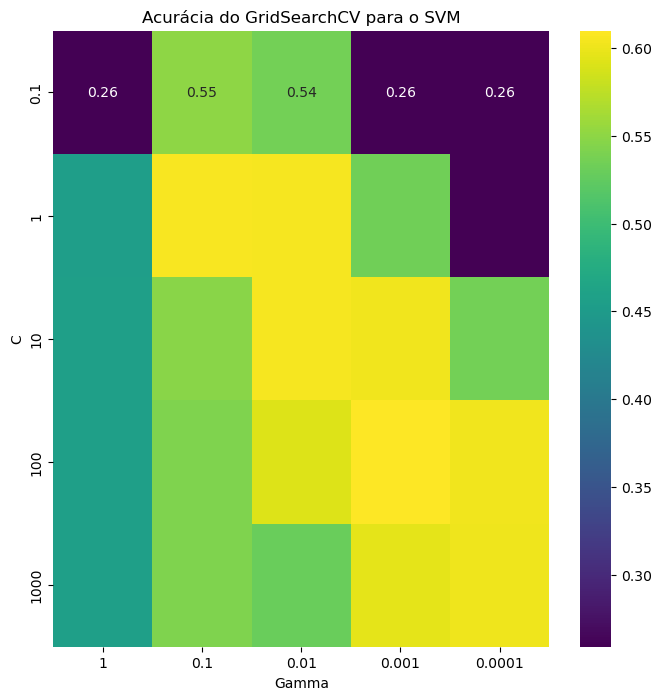

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the mean test scores into a 5x5 grid for the values of 'C' and 'gamma'
scores = results['mean_test_score'].reshape(5, 5)

# Plot a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Acurácia do GridSearchCV para o SVM')
plt.show()

In [10]:
import joblib


# Acessar o melhor estimador encontrado pelo GridSearchCV
best_svm_model = grid_search.best_estimator_

# Salvar o melhor modelo
joblib.dump(best_svm_model, 'best_svm_model.pkl')


['best_svm_model.pkl']